In [1]:
## 1次元拡散方程式を解くプログラム（解答）
# このプログラムでは、各タイムステップごとの計算結果をpngファイルで保存可能です。
# Gifアニメーション作成でこのプログラムを使います。

In [2]:
## Import Modules
import numpy as np
from scipy.stats import hmean
import matplotlib.pyplot as plt

In [3]:
def PlotSavePressure(x, P, t, L):
  # fig = plt.figure()
  plt.plot(x, P_new, label='t={0:05.2f}'.format(t)) 
  plt.xlabel('x[m]')
  plt.ylabel('Pressure [Pa]')
  plt.xlim(0, L)
  plt.ylim(-1,1)
  plt.grid()
  plt.title('Pressure Diffusion 1D@{0:05.2f}[s]'.format(t))
  # fig.savefig('t={0:05.2f}.png'.format(t))
  fig.savefig('Diffsuion_ans.png'.format(t))
  # plt.clf()
  return

In [4]:
## Input Parmeters
L = 2*np.pi # Length of Reservoir[m]
N = 100 # Number of Control Volume[-]
k = 0.2*np.ones(N) # Permiability[m^2]
phi = np.ones(N) # Porosity[m^2]
c = np.ones(N) # Compressibility[Pa^-1]
mu= 1 # Viscosity of Fluid[Pa^-1]
dx = L/N # Size of Control Volume[m]
x = np.zeros(N) # x coordinate[m]
x[0] = dx/2
for i in range(1, N):
  x[i] = x[i-1] + dx

## Parameters for Simulation
tmax = 20 # Time to stop simlation [s]
dt   = 0.005   # dt [s]
nout = 500  # output result ever nout step[s]
# Variable to decide Boundary condition
# 1 -> Neumann, 0 -> Dirichlet
B_left  = 0 # Boundary at Left (x = 0)
B_right = 0 # Boundary at right(x = L)
Pb_left  = 0 # Pressure Value at x = 0 
Pb_right = 0 # Pressure Value at x = L

## Initial Conditions
# P_init = np.ones(N)      # Initial Pressure
P_init = np.sin(x)


0500th Time step 02.50
1000th Time step 05.00
1500th Time step 07.50
2000th Time step 10.00
2500th Time step 12.50
3000th Time step 15.00
3500th Time step 17.50


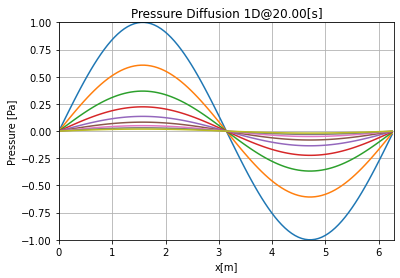

In [5]:
## Simulation
P_old  = np.copy(P_init) # Pressure at n-th step
P_new  = np.copy(P_init) # Pressure at n+1-th step
t = 0
n = 0

# Plot Initial Condition
fig = plt.figure()
PlotSavePressure(x, P_new, t, L)
while True:
  for i in range(1, N-1): # for P[1] ~ P[N-2]
    # alpha = #-# Write Your Code Here #-#
    alpha = dt / (phi[i]*c[i])
    lam_w = hmean([k[i-1], k[i]])/mu
    lam_e = hmean([k[i+1], k[i]])/mu
    # A = #-# Write Your Code Here #-#
    # B = #-# Write Your Code Here #-#
    # C = #-# Write Your Code Here #-#
    A = lam_e * alpha / (dx**2);C = lam_w * alpha / (dx**2)
    B = 1 - A - C;
    P_new[i] = A*P_old[i+1] + B*P_old[i] + C*P_old[i-1]
  
  # P[0]
  if B_left == 1: # Neumann Condition
    alpha = dt / (phi[0]*c[0])
    lam_w = hmean([k[0], k[0]])/mu
    lam_e = hmean([k[0+1], k[0]])/mu
    A = lam_e * alpha / (dx**2);C = lam_w * alpha / (dx**2)
    B = 1 - A - C;
    P_new[0] = A*P_old[1] + B*P_old[0] + C*P_old[0]

  else: # Dirichlet Condition 
    alpha = dt / (phi[0]*c[0])
    lam_w = hmean([k[0], k[0]])/mu
    lam_e = hmean([k[0+1], k[0]])/mu
    A = lam_e * alpha / (dx**2);C = lam_w * alpha / (dx**2)
    B = 1 - A - C;
    P_new[0] = A*P_old[1] + B*P_old[0] + C*(2*Pb_left - P_old[0])    

  # P[N-1]
  if B_right == 1: # Neumann Condition
    alpha = dt / (phi[N-1]*c[N-1])
    lam_w = hmean([k[N-2], k[N-1]])/mu
    lam_e = hmean([k[N-1], k[N-1]])/mu
    A = lam_e * alpha / (dx**2);C = lam_w * alpha / (dx**2)
    B = 1 - A - C;
    P_new[N-1] = A*P_old[N-1] + B*P_old[N-1] + C*P_old[N-2]
  else: # Dirichlet Condition 
    alpha = dt / (phi[N-1]*c[N-1])
    lam_w = hmean([k[N-2], k[N-1]])/mu
    lam_e = hmean([k[N-1], k[N-1]])/mu
    A = lam_e * alpha / (dx**2);C = lam_w * alpha / (dx**2)
    B = 1 - A - C;
    P_new[N-1] = A*(2*Pb_right- P_old[N-1]) + B*P_old[N-1] + C*P_old[N-2]

  # Update Values, time step and Loop counter
  P_old = np.copy(P_new)
  t = t + dt
  n = n + 1
  if t >= tmax:
    break
  if n%nout == 0:
    print('{0:04d}th Time step {1:05.2f}'.format(n, t))
    PlotSavePressure(x, P_new, t, L)

    
PlotSavePressure(x, P_new, t, L)
plt.show()